#  XAI alBERT - Suicide Detection
**Autora:** Antonia Estefane Ribeiro Veras

**Orientador:** Adonias Caetano de Oliveira

**Instituição:** IFCE

**Dataset disponível em:**


## Instalação de pacotes

In [ ]:
!pip install Unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 1.9 MB/s eta 0:00:00


In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=eb40d88330e9b0f916cf689e0604fd3648b9830b4c072d2a701d657fd64b06f7
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
!pip install wordcloud

In [ ]:
#hide
!pip install transformers

## Importação de Bibliotecas

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#text preprocessing libraries
import pandas as pd
import re
from unidecode import unidecode
from string import punctuation
import nltk
from nltk import sent_tokenize
from nltk import word_tokenize
from nltk.corpus import stopwords

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
#text classification libraries
from transformers import BertTokenizer, BertForSequenceClassification
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from lime.lime_text import LimeTextExplainer
from scipy.special import expit


In [ ]:
from google.colab import drive

## Montagem do Drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


## Carregamento do Dataset

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/datasets/Suicide_Detection.csv')
# exibir as primeiras 10 linhas
dataset = dataset.rename(columns={'selftext_clean': 'text', 'is_suicide': 'class'})

dataset.head(10)


## Pré-Processamento de Texto

In [ ]:
nltk.download('rslp')
nltk.download('stopwords')
stopwords_list = stopwords.words("english")
print(stopwords_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data_process = dataset.copy()

In [ ]:
import re
from unidecode import unidecode

old_texts = data_process["text"]
new_texts = []


for text in old_texts:
    if isinstance(text, str):  # Verifica se text é uma string
        text = re.sub('@[^\s]+', '', text)
        text = unidecode(text)
        text = re.sub('<[^<]+?>','', text)

    else:
        text = str(text)  # Converte para string
        text = re.sub('@[^\s]+', '', text)
        text = unidecode(text)
        text = re.sub('<[^<]+?>','', text)



In [ ]:
data_process

,Unnamed: 0,text,class
74414,111734,dont know months self harm free urge gets stro...,1
149516,224358,start becoming rich start company become affor...,0
12484,18790,poem haiku umegamedev hi hello hello stop fuck...,0
14043,21196,ive honestly got idea anymoreit feels everyone...,1
30673,46089,ever cry like think unfair life cry cant cry e...,0
...,...,...,...
89778,134858,crying againi feel unbelievably terrible thoug...,1
6705,10045,yearsits almost years since hung head cloud li...,1
112057,168382,wtf wrong people figured someone murdered grea...,0
111018,166876,fact day north island new zealand place named ...,0


## Visualização dos Dados

<Axes: xlabel='class', ylabel='count'>

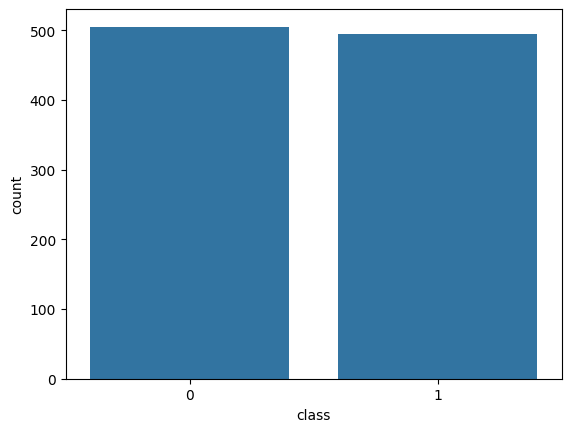

In [ ]:
sns.countplot(x = data_process['class'])

### Balanceamento dos Dados

<Axes: xlabel='class', ylabel='count'>

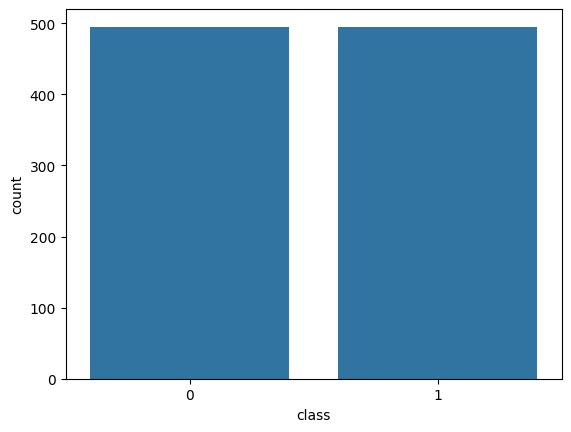

In [ ]:
rus = RandomUnderSampler(random_state= 0)
X_bal, Y_bal = rus.fit_resample(data_process[['text']], data_process['class'])
sns.countplot(x = Y_bal)

### Criação da Wordcloud

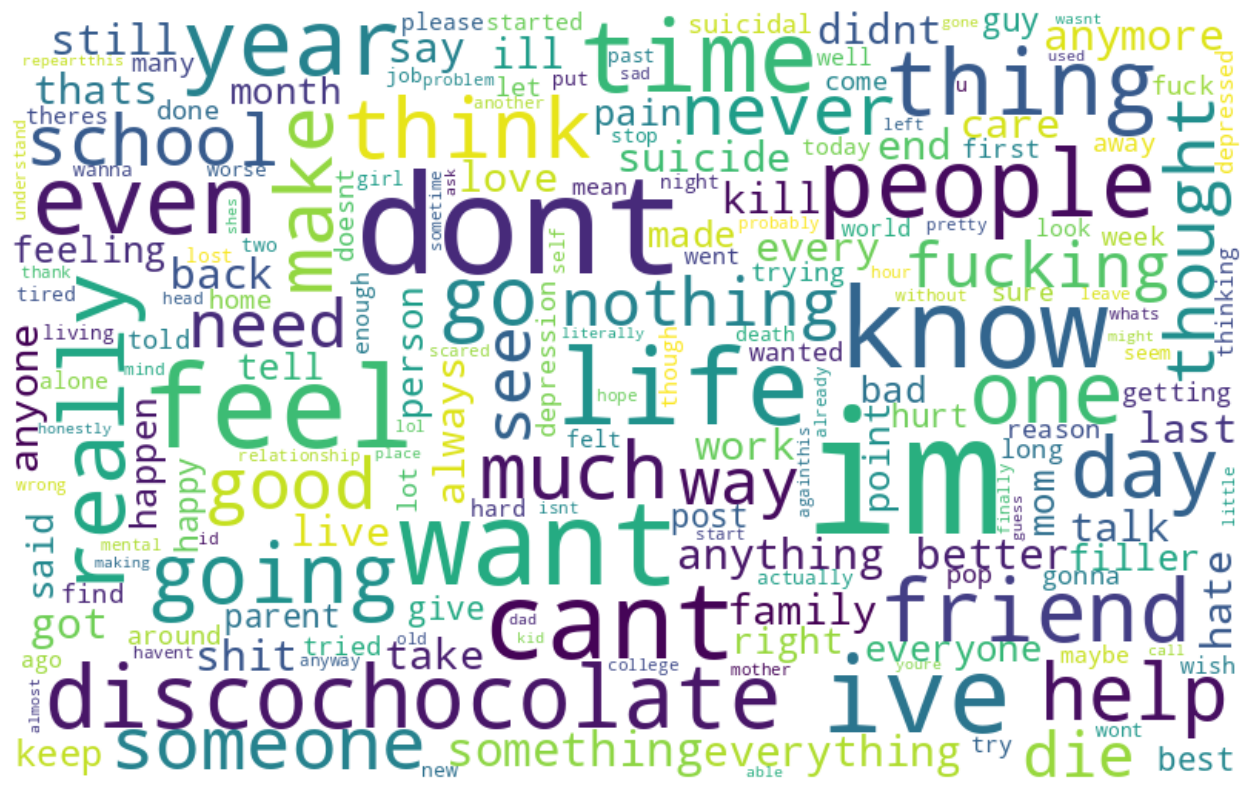

In [ ]:
new_texts = data_process["text"]
all_words = ' '.join([str(text) for text in new_texts if isinstance(text, str)])
word_cloud = WordCloud(width= 800, height= 500, max_font_size = 110, background_color="white", collocations = False).generate(all_words)
plt.figure(figsize=(20,10))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Divisão dos Dados em Conjuntos de Treinamento, Validação

In [ ]:
# Dividir o dataset em conjunto de treinamento e validação
train_df, valid_df, train_label, valid_label = train_test_split(X_bal, Y_bal, test_size=0.20, random_state=42)


## Inicialização do Tokenizador e do Modelo

In [ ]:
from transformers import AlbertForSequenceClassification, AlbertTokenizer
N_labels = len(train_label.unique())

# Inicialização do tokenizador ALBERT
PRETRAINED_LM = 'albert-base-v2'
tokenizer = AlbertTokenizer.from_pretrained(PRETRAINED_LM, do_lower_case=True)

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/760k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.31M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/684 [00:00<?, ?B/s]

## Definição de Funções Auxiliares

In [ ]:
def encode(docs):
    '''
    This function takes list of texts and returns input_ids and attention_mask of texts
    '''
    encoded_dict = tokenizer.batch_encode_plus(docs, add_special_tokens=True, max_length=128, padding='max_length',
                            return_attention_mask=True, truncation=True, return_tensors='pt')
    input_ids = encoded_dict['input_ids']
    attention_masks = encoded_dict['attention_mask']
    return input_ids, attention_masks

## Preparação dos dados para o treinamento do modelo

In [ ]:
train_input_ids, train_att_masks = encode(train_df['text'].values.tolist())
valid_input_ids, valid_att_masks = encode(valid_df['text'].values.tolist())

In [ ]:
import torch
train_y = torch.LongTensor(train_label.values)
valid_y = torch.LongTensor(valid_label.values)
train_y.size(),valid_y.size()

(torch.Size([633]), torch.Size([159]), torch.Size([198]))

In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

BATCH_SIZE = 16
train_dataset = TensorDataset(train_input_ids, train_att_masks, train_y)
train_sampler = RandomSampler(train_dataset)
train_dataloader = DataLoader(train_dataset, sampler=train_sampler, batch_size=BATCH_SIZE)

valid_dataset = TensorDataset(valid_input_ids, valid_att_masks, valid_y)
valid_sampler = SequentialSampler(valid_dataset)
valid_dataloader = DataLoader(valid_dataset, sampler=valid_sampler, batch_size=BATCH_SIZE)

test_dataset = TensorDataset(test_input_ids, test_att_masks, test_y)
test_sampler = SequentialSampler(test_dataset)
test_dataloader = DataLoader(test_dataset, sampler=test_sampler, batch_size=BATCH_SIZE)

In [ ]:
train_label.unique()

array([0, 1])

In [ ]:
# Inicialização do modelo ALBERT
model = AlbertForSequenceClassification.from_pretrained(PRETRAINED_LM, num_labels=N_labels)


model.safetensors:   0%|          | 0.00/47.4M [00:00<?, ?B/s]

Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [ ]:
model = model.to(device)


In [ ]:
from torch.optim import AdamW
from transformers import get_linear_schedule_with_warmup

# Best results: 07 and 08
EPOCHS = 13
LEARNING_RATE = 2e-6

optimizer = AdamW(model.parameters(), lr=LEARNING_RATE)
scheduler = get_linear_schedule_with_warmup(optimizer,
             num_warmup_steps=0,
            num_training_steps=len(train_dataloader)*EPOCHS )

## Treinamento do modelo

In [ ]:
#collapse-output
from torch.nn.utils import clip_grad_norm_
from tqdm.notebook import tqdm
import numpy as np
import math

train_loss_per_epoch = []
val_loss_per_epoch = []


for epoch_num in range(EPOCHS):
    print('Epoch: ', epoch_num + 1)
    '''
    Training
    '''
    model.train()
    train_loss = 0
    for step_num, batch_data in enumerate(tqdm(train_dataloader,desc='Training')):
        input_ids, att_mask, labels = [data.to(device) for data in batch_data]
        output = model(input_ids = input_ids, attention_mask=att_mask, labels= labels)

        loss = output.loss
        train_loss += loss.item()

        model.zero_grad()
        loss.backward()
        del loss

        clip_grad_norm_(parameters=model.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()

    train_loss_per_epoch.append(train_loss / (step_num + 1))


    '''
    Validation
    '''
    model.eval()
    valid_loss = 0
    valid_pred = []
    with torch.no_grad():
        for step_num_e, batch_data in enumerate(tqdm(valid_dataloader,desc='Validation')):
            input_ids, att_mask, labels = [data.to(device) for data in batch_data]
            output = model(input_ids = input_ids, attention_mask=att_mask, labels= labels)

            loss = output.loss
            valid_loss += loss.item()

            valid_pred.append(np.argmax(output.logits.cpu().detach().numpy(),axis=-1))

    val_loss_per_epoch.append(valid_loss / (step_num_e + 1))
    valid_pred = np.concatenate(valid_pred)

    '''
    Loss message
    '''
    print("{0}/{1} train loss: {2} ".format(step_num+1, math.ceil(len(train_df) / BATCH_SIZE), train_loss / (step_num + 1)))
    print("{0}/{1} val loss: {2} ".format(step_num_e+1, math.ceil(len(valid_df) / BATCH_SIZE), valid_loss / (step_num_e + 1)))

Epoch:  1


Training:   0%|          | 0/40 [00:00<?, ?it/s]

Validation:   0%|          | 0/10 [00:00<?, ?it/s]

40/40 train loss: 0.13389247711747884 
10/10 val loss: 0.24787756204605102 
Epoch:  2


Training:   0%|          | 0/40 [00:00<?, ?it/s]

Validation:   0%|          | 0/10 [00:00<?, ?it/s]

40/40 train loss: 0.09771842956542968 
10/10 val loss: 0.26019794717431066 
Epoch:  3


Training:   0%|          | 0/40 [00:00<?, ?it/s]

Validation:   0%|          | 0/10 [00:00<?, ?it/s]

40/40 train loss: 0.07871455149725079 
10/10 val loss: 0.23766636550426484 
Epoch:  4


Training:   0%|          | 0/40 [00:00<?, ?it/s]

Validation:   0%|          | 0/10 [00:00<?, ?it/s]

40/40 train loss: 0.061303111957386136 
10/10 val loss: 0.23406870253384113 
Epoch:  5


Training:   0%|          | 0/40 [00:00<?, ?it/s]

Validation:   0%|          | 0/10 [00:00<?, ?it/s]

40/40 train loss: 0.04880339000374079 
10/10 val loss: 0.2386317614465952 
Epoch:  6


Training:   0%|          | 0/40 [00:00<?, ?it/s]

Validation:   0%|          | 0/10 [00:00<?, ?it/s]

40/40 train loss: 0.03797175851650536 
10/10 val loss: 0.249199309758842 
Epoch:  7


Training:   0%|          | 0/40 [00:00<?, ?it/s]

Validation:   0%|          | 0/10 [00:00<?, ?it/s]

40/40 train loss: 0.032276210957206786 
10/10 val loss: 0.24940622840076684 
Epoch:  8


Training:   0%|          | 0/40 [00:00<?, ?it/s]

Validation:   0%|          | 0/10 [00:00<?, ?it/s]

40/40 train loss: 0.024129112332593648 
10/10 val loss: 0.2520815109834075 
Epoch:  9


Training:   0%|          | 0/40 [00:00<?, ?it/s]

Validation:   0%|          | 0/10 [00:00<?, ?it/s]

40/40 train loss: 0.023361273237969726 
10/10 val loss: 0.25623843278735875 
Epoch:  10


Training:   0%|          | 0/40 [00:00<?, ?it/s]

Validation:   0%|          | 0/10 [00:00<?, ?it/s]

40/40 train loss: 0.018338143615983425 
10/10 val loss: 0.2559744639322162 
Epoch:  11


Training:   0%|          | 0/40 [00:00<?, ?it/s]

Validation:   0%|          | 0/10 [00:00<?, ?it/s]

40/40 train loss: 0.0157813654106576 
10/10 val loss: 0.25929534146562216 
Epoch:  12


Training:   0%|          | 0/40 [00:00<?, ?it/s]

Validation:   0%|          | 0/10 [00:00<?, ?it/s]

40/40 train loss: 0.014564869878813624 
10/10 val loss: 0.2538154723122716 
Epoch:  13


Training:   0%|          | 0/40 [00:00<?, ?it/s]

Validation:   0%|          | 0/10 [00:00<?, ?it/s]

40/40 train loss: 0.013652457832358777 
10/10 val loss: 0.255014212988317 


## Avaliação do Modelo

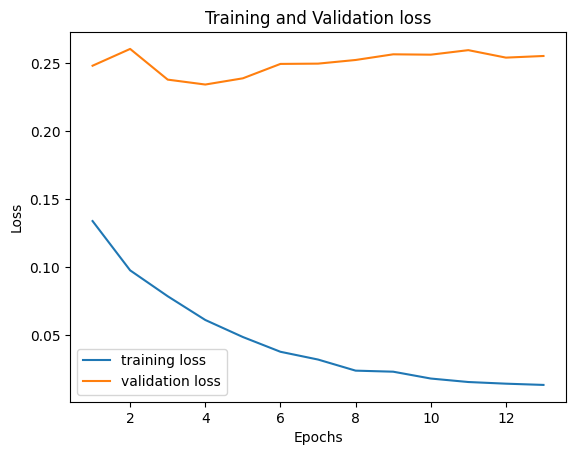

In [ ]:
from matplotlib import pyplot as plt
epochs = range(1, EPOCHS +1 )
fig, ax = plt.subplots()
ax.plot(epochs,train_loss_per_epoch,label ='training loss')
ax.plot(epochs, val_loss_per_epoch, label = 'validation loss' )
ax.set_title('Training and Validation loss')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print('classifiation report')
print(classification_report(valid_pred, valid_label.to_numpy()))


classifiation report
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        78
           1       0.94      0.93      0.93        81

    accuracy                           0.93       159
   macro avg       0.93      0.93      0.93       159
weighted avg       0.93      0.93      0.93       159



In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
def plot_confusion_matrix(y_preds, y_true, labels=None):
  cm = confusion_matrix(y_true, y_preds, normalize="true")
  fig, ax = plt.subplots(figsize=(6, 6))
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
  disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
  plt.title("Normalized confusion matrix")
  plt.show()

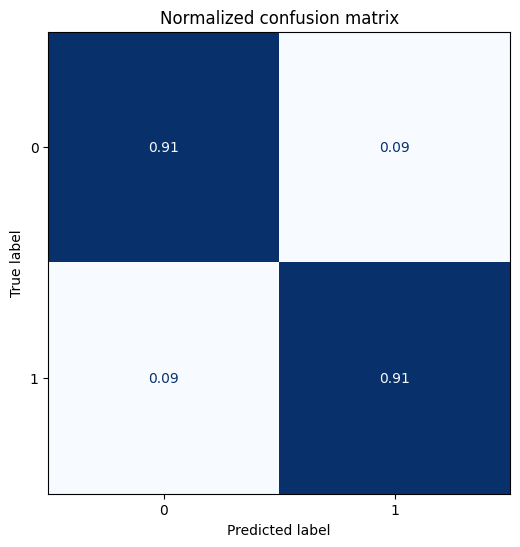

In [ ]:
plot_confusion_matrix(valid_pred,valid_label.to_numpy())

## Interpretabilidade do Modelo com Lime


In [ ]:
def predict_proba(sentences):
  model.eval()
  probabilities = []

  test_input_ids, test_att_masks = encode(sentences)
  BATCH_SIZE = 16
  test_y = torch.LongTensor([0] * len(sentences))
  test_dataset = TensorDataset(test_input_ids, test_att_masks, test_y)
  test_sampler = SequentialSampler(test_dataset)
  test_dataloader = DataLoader(test_dataset, sampler=test_sampler, batch_size=BATCH_SIZE)

  with torch.no_grad():
    for step_num, batch_data in tqdm(enumerate(test_dataloader)):
        input_ids, att_mask, labels = [data.to(device) for data in batch_data]
        output = model(input_ids = input_ids, attention_mask=att_mask, labels= labels)

        probabilities.append(expit(output.logits.cpu().detach().numpy()))

  probabilities = np.concatenate(probabilities)

  return probabilities

In [ ]:
# Lista de frases para teste
frases_teste = [
    'feeling sick anxious need help please',
    'doe anyone know specific name cleaning product mix kill oneself',
    'assume death virus something else would le suicidal',
    'want disappear painlessly',
    'suffering humiliation worrying future bad im coward wanna die bad',
    'always feel happy whole get one dont make even sad feel like something wrong',
    'literally care anything else want happy',
    'cheer celebrating another day packed activity sleeping lot wanting anything interested anything staring ceiling watching paint dry',
    'win depression',
    'today first appointment psychologist know going work might give ha worked'
]

In [ ]:
labels_names = ['non-suicide', 'suicide']

explainer = LimeTextExplainer(class_names = labels_names)

In [ ]:
# Loop sobre as frases de teste
for frase in frases_teste:
    # Gerando a explicação Lime para a frase atual
    exp = explainer.explain_instance(frase, classifier_fn=predict_proba, num_features=10)
    # Mostrando a explicação no console
    print("Frase:", frase)
    exp.show_in_notebook(text=True)
    print("\n")